In [1]:
! pip install quandl

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
import quandl
quandl.ApiConfig.api_key = "zuiQMfguw3rRgLvkCzxk"
dfg = quandl.get('WIKI/GOOGL')
dfin = quandl.get('EOD/INTC')
dfms = quandl.get('EOD/MSFT')

In [4]:
dfg.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [5]:
dfin.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
1980-03-17,62.5,63.50,62.50,62.50,56900.0,0.0,1.0,0.209556,0.212909,0.209556,0.209556,10924800.0
1980-03-18,62.5,63.00,62.00,62.00,88900.0,0.0,1.0,0.209556,0.211233,0.207880,0.207880,17068800.0
1980-03-19,63.5,64.50,63.50,63.50,96400.0,0.0,1.0,0.212909,0.216262,0.212909,0.212909,18508800.0
1980-03-20,63.5,64.25,63.25,63.25,58200.0,0.0,1.0,0.212909,0.215424,0.212071,0.212071,11174400.0
1980-03-21,62.0,62.00,61.00,61.00,63400.0,0.0,1.0,0.207880,0.207880,0.204527,0.204527,12172800.0


In [6]:
dfms.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
1986-03-13,25.50,29.25,25.5,28.00,3582600.0,0.0,1.0,0.057689,0.066173,0.057689,0.063345,1.031789e+09
1986-03-14,28.00,29.50,28.0,29.00,1070000.0,0.0,1.0,0.063345,0.066738,0.063345,0.065607,3.081600e+08
1986-03-17,29.00,29.75,29.0,29.50,462400.0,0.0,1.0,0.065607,0.067304,0.065607,0.066738,1.331712e+08
1986-03-18,29.50,29.75,28.5,28.75,235300.0,0.0,1.0,0.066738,0.067304,0.064476,0.065041,6.776640e+07
1986-03-19,28.75,29.00,28.0,28.25,166300.0,0.0,1.0,0.065041,0.065607,0.063345,0.063910,4.789440e+07


In [0]:
dfg_mod=dfg.rename(columns={'Adj. Open':'Adj_Open','Adj. High':'Adj_High','Adj. Low':'Adj_Low','Adj. Close':'Adj_Close','Adj. Volume'	:'Adj_Volume'})


 	 	 	 	

In [0]:
all_data=  [dfg_mod,dfin,dfms]

In [9]:
dfg_mod=dfg_mod[['Adj_Open','Adj_High','Adj_Low','Adj_Close','Adj_Volume']]
dfg_mod['volatility']=(dfg_mod['Adj_High']-dfg_mod['Adj_Close'])/dfg_mod['Adj_Close']
dfg_mod['PCT_Change']=(dfg_mod['Adj_Close']-dfg_mod['Adj_Open'])/dfg_mod['Adj_Open']
## train test spliit

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
forcast_col='Adj_Close'

In [11]:
dfg_mod.isna().all()

Adj_Open      False
Adj_High      False
Adj_Low       False
Adj_Close     False
Adj_Volume    False
volatility    False
PCT_Change    False
dtype: bool

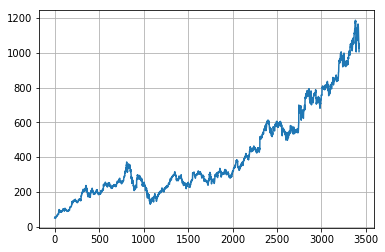

In [12]:
## desplaying the forcast column

## displaying the previous output
Y=dfg_mod[forcast_col]
X=range(len(dfg_mod[forcast_col]))
#ig_size=[30,5]
#plt.rcParams["figure.figsize"] = fig_size
plt.plot(X,Y)
plt.grid()

In [13]:
dfg_mod.head()

,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,volatility,PCT_Change
Date,,,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0,0.037126,0.003250
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0,0.007109,0.072270
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0,0.037294,-0.012279
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0,0.064175,-0.057264
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0,0.018868,0.011837


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19074a3d68>,
      dtype=object)

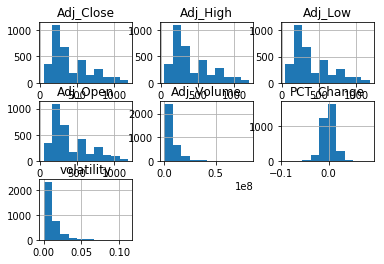

In [14]:
dfg_mod.hist()

In [0]:
## the data is skewed

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [0]:
df=dfg_mod

In [17]:
df.head()

,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,volatility,PCT_Change
Date,,,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0,0.037126,0.003250
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0,0.007109,0.072270
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0,0.037294,-0.012279
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0,0.064175,-0.057264
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0,0.018868,0.011837


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f190764b8d0>,
      dtype=object)

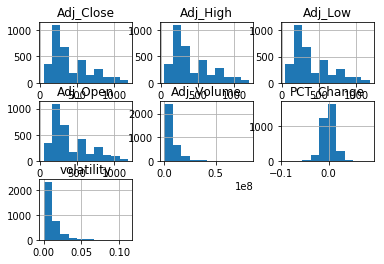

In [18]:
df.hist()

In [0]:
from sklearn.model_selection import train_test_split

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18f92d0400>,
      dtype=object)

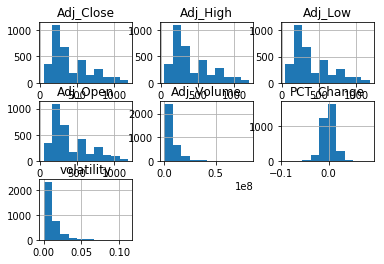

In [20]:
df.hist()

In [0]:
## slicing the train and target value
Y = df[[forcast_col]]

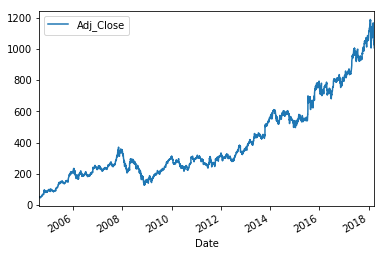

In [22]:
Y.plot()

In [0]:
X =  df.drop(forcast_col,axis=1)

In [24]:
X.head()

,Adj_Open,Adj_High,Adj_Low,Adj_Volume,volatility,PCT_Change
Date,,,,,,
2004-08-19,50.159839,52.191109,48.128568,44659000.0,0.037126,0.003250
2004-08-20,50.661387,54.708881,50.405597,22834300.0,0.007109,0.072270
2004-08-23,55.551482,56.915693,54.693835,18256100.0,0.037294,-0.012279
2004-08-24,55.792225,55.972783,51.945350,15247300.0,0.064175,-0.057264
2004-08-25,52.542193,54.167209,52.100830,9188600.0,0.018868,0.011837


In [25]:
X.tail()

,Adj_Open,Adj_High,Adj_Low,Adj_Volume,volatility,PCT_Change
Date,,,,,,
2018-03-21,1092.57,1108.70,1087.21,1990515.0,0.013437,0.001309
2018-03-22,1080.01,1083.92,1049.64,3418154.0,0.029217,-0.024870
2018-03-23,1051.37,1066.78,1024.87,2413517.0,0.039190,-0.023607
2018-03-26,1050.60,1059.27,1010.58,3272409.0,0.004914,0.003322
2018-03-27,1063.90,1064.54,997.62,2940957.0,0.057203,-0.053539


In [0]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)
xtrain_nor = normalize(xtrain)
xtest_nor = normalize(xtest)

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

In [28]:
! pip install mlxtend

In [0]:
from mlxtend.regressor import StackingRegressor
lsvc=LinearSVR()
dtc=DecisionTreeRegressor()
knnc=KNeighborsRegressor()
svc=SVR()
gbc=GradientBoostingRegressor()
rfc=RandomForestRegressor()


Stacking regression is an ensemble learning technique to combine multiple regression models via a meta-regressor. The individual regression models are trained based on the complete training set; then, the meta-regressor is fitted based on the outputs -- meta-features -- of the individual regression models in the ensemble.![alt text](http://rasbt.github.io/mlxtend/user_guide/regressor/StackingRegressor_files/stackingregression_overview.png)

In [0]:
stregr = StackingRegressor(regressors=[lsvc,dtc,knnc,svc,gbc,rfc], 
                           meta_regressor=lsvc)


In [31]:
stregr

StackingRegressor(meta_regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0),
         refit=True,
         regressors=[LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0), DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, mi...rs='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)],
         store_train_meta_features=False, use_features_in_secondary=False,
         verbose=0)

In [32]:
stregr.fit(xtrain, ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this w

StackingRegressor(meta_regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0),
         refit=True,
         regressors=[LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0), DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, mi...rs='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)],
         store_train_meta_features=False, use_features_in_secondary=False,
         verbose=0)

In [0]:
prediction = stregr.predict(xtest)

In [34]:
prediction

array([ 573.15694042,  841.9493036 ,  561.24640185,  187.3696213 ,
        271.50877699,  290.76123836,   91.21882235,  948.08923478,
        265.89807164,  861.37096578,  456.84694211,  842.41566878,
         90.31907061, 1143.21354356, 1070.72969862,  280.87259799,
        287.6014604 ,  310.16349202,  287.88267741,  291.12429601,
         98.43127998,  308.58276502,  344.91761983,  178.40546195,
        219.53185469,  286.19881494, 1051.61613153,  201.81407067,
        232.54903012,  396.47407128,  261.25737809, 1005.06916242,
        219.69392635,  441.2589425 ,  242.22293802, 1056.70869401,
        154.83602935,  209.8691989 ,  573.49546645,  232.00757826,
        718.19383752,  311.02867079,  225.00176027,  229.35954279,
        254.91362025,  797.69317979,  150.41190104,  275.6243511 ,
        298.88830396,  345.76890941,  763.02231665,  335.87474075,
        450.12952579,  244.70643251,  246.31075618,  429.29854201,
        415.3449205 ,  829.31806986,  210.06112393,  249.61398

In [35]:
print('Accuracy: %.4f' % stregr.score(xtest, ytest))


Accuracy: 0.9998


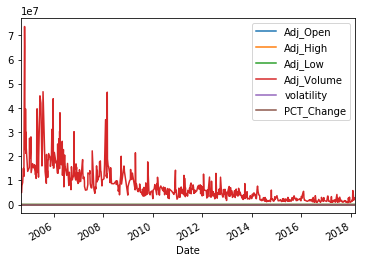

In [36]:
xtest.plot()

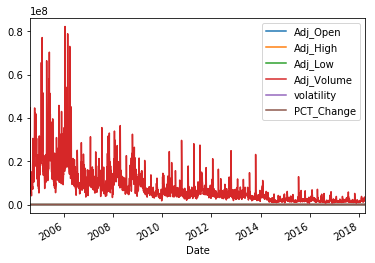

In [37]:
xtrain.plot()

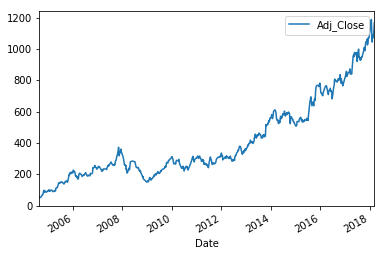

In [38]:
ytest.plot()

In [40]:
ytest.head()

,Adj_Close
Date,
2014-05-28,570.450000
2017-02-14,840.030000
2013-12-27,560.931542
2006-02-24,189.284303
2011-08-30,271.187129


In [0]:
date=ytest.index

In [0]:
dm={'Date':date,'Adj_Close':prediction}

In [43]:
dm

{'Adj_Close': array([ 573.15694042,  841.9493036 ,  561.24640185,  187.3696213 ,
         271.50877699,  290.76123836,   91.21882235,  948.08923478,
         265.89807164,  861.37096578,  456.84694211,  842.41566878,
          90.31907061, 1143.21354356, 1070.72969862,  280.87259799,
         287.6014604 ,  310.16349202,  287.88267741,  291.12429601,
          98.43127998,  308.58276502,  344.91761983,  178.40546195,
         219.53185469,  286.19881494, 1051.61613153,  201.81407067,
         232.54903012,  396.47407128,  261.25737809, 1005.06916242,
         219.69392635,  441.2589425 ,  242.22293802, 1056.70869401,
         154.83602935,  209.8691989 ,  573.49546645,  232.00757826,
         718.19383752,  311.02867079,  225.00176027,  229.35954279,
         254.91362025,  797.69317979,  150.41190104,  275.6243511 ,
         298.88830396,  345.76890941,  763.02231665,  335.87474075,
         450.12952579,  244.70643251,  246.31075618,  429.29854201,
         415.3449205 ,  829.3180698

In [0]:
df2=pd.DataFrame(dm)

In [45]:
df2.head()

,Date,Adj_Close
0,2014-05-28,573.156940
1,2017-02-14,841.949304
2,2013-12-27,561.246402
3,2006-02-24,187.369621
4,2011-08-30,271.508777


In [47]:
df2.set_index("Date", inplace = True)

KeyError: ignored

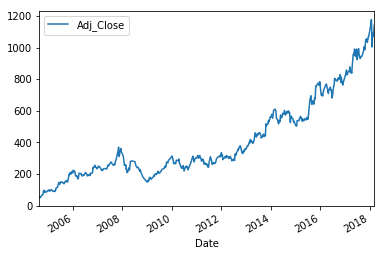

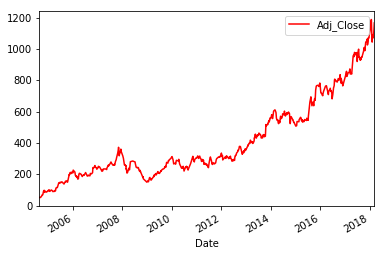

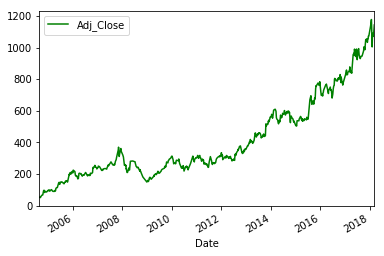

In [48]:
df2.plot()
ytest.plot(color='red')
df2.plot(color='green')

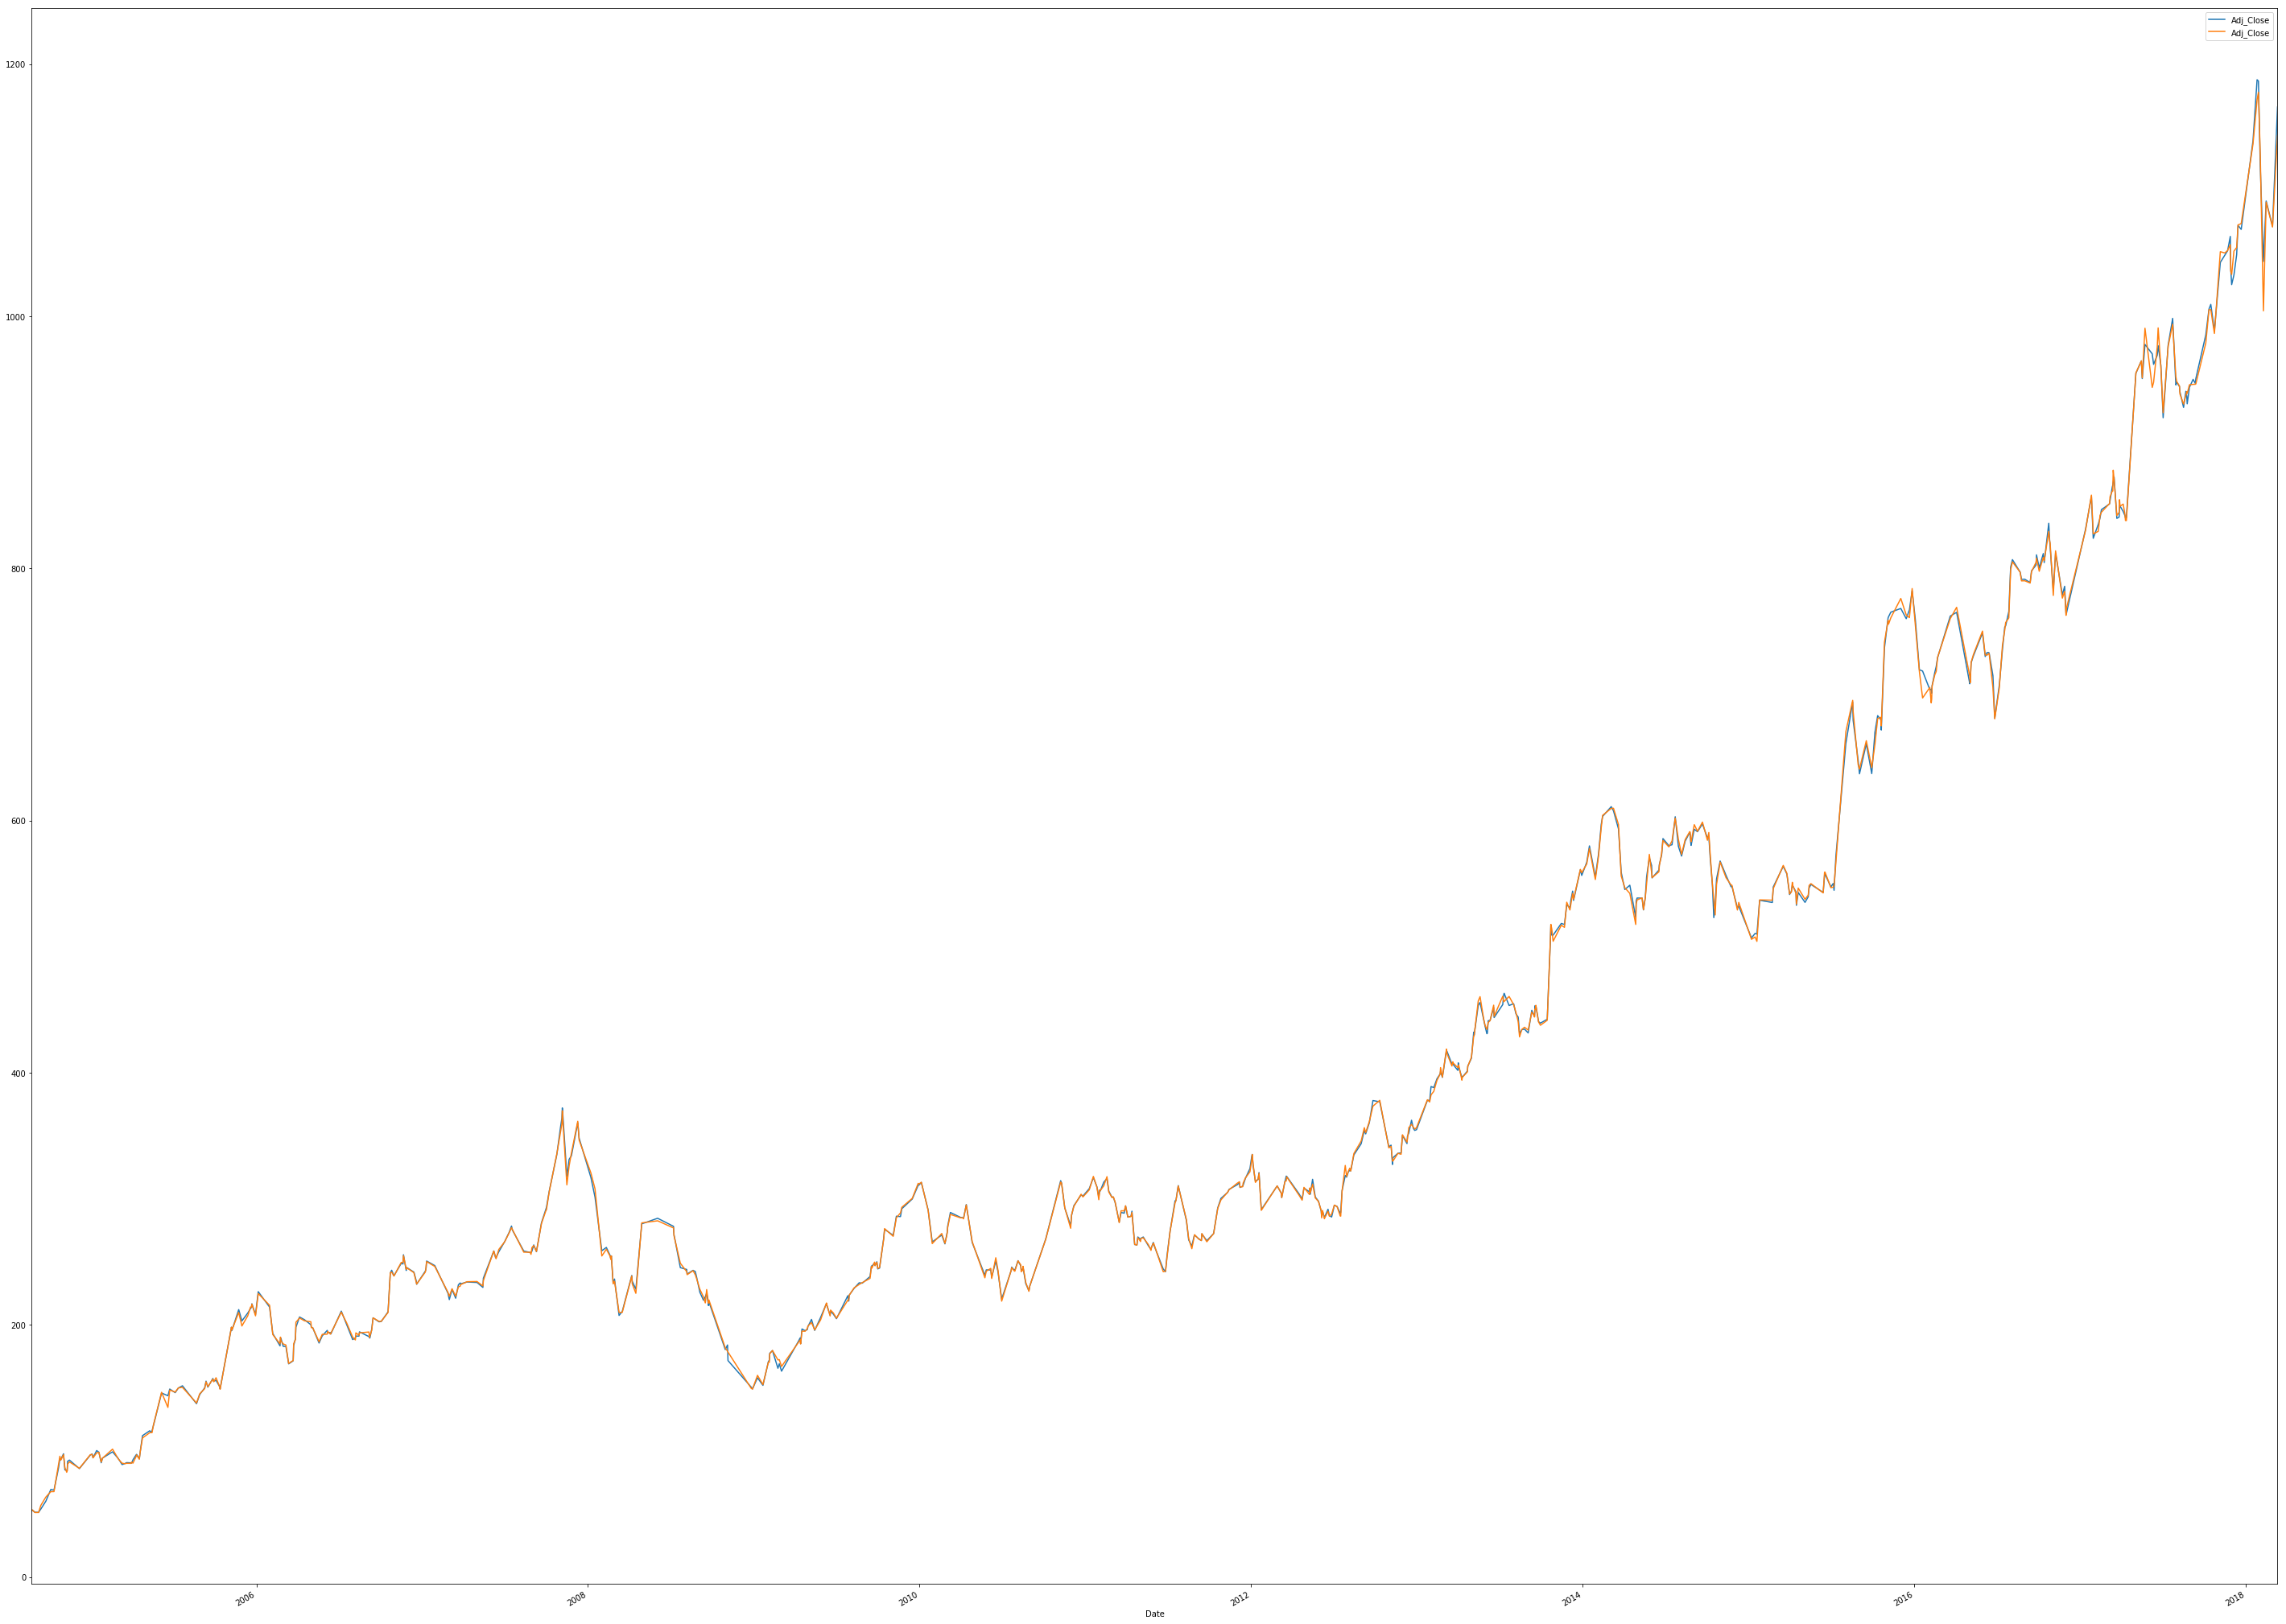

In [49]:
p = ytest.plot()
df2.plot(ax=p,figsize=(50, 40))

In [0]:
sample_result=[]
MachineLearningAlgo=[]
X=['DecisionRegressor','KNeighborsRegressor','GradientBoostingRegressor','RandomForestRegressor']
Z=[DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),RandomForestRegressor()]

In [58]:
for model in Z:
    model.fit(xtrain,ytrain)      ## training the model this could take a little time
    accuracy=model.score(xtest,ytest)    ## comparing result with the test data set
    MachineLearningAlgo.append(accuracy) 
    ## saving the accuracy

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [0]:
d={'Accuracy':MachineLearningAlgo,'Algorithm':X}
df1=pd.DataFrame(d)

In [60]:
df1

,Accuracy,Algorithm
0,0.999801,DecisionRegressor
1,0.633959,KNeighborsRegressor
2,0.999832,GradientBoostingRegressor
3,0.999893,RandomForestRegressor


In [0]:
rfg=RandomForestRegressor()

In [62]:
rfg.fit(xtrain,ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [0]:
pred3=rfg.score(xtest,ytest)

In [0]:
dm2={'Date':date,'Adj_Close':prediction}

In [0]:
pred3df=pd.DataFrame(dm2)

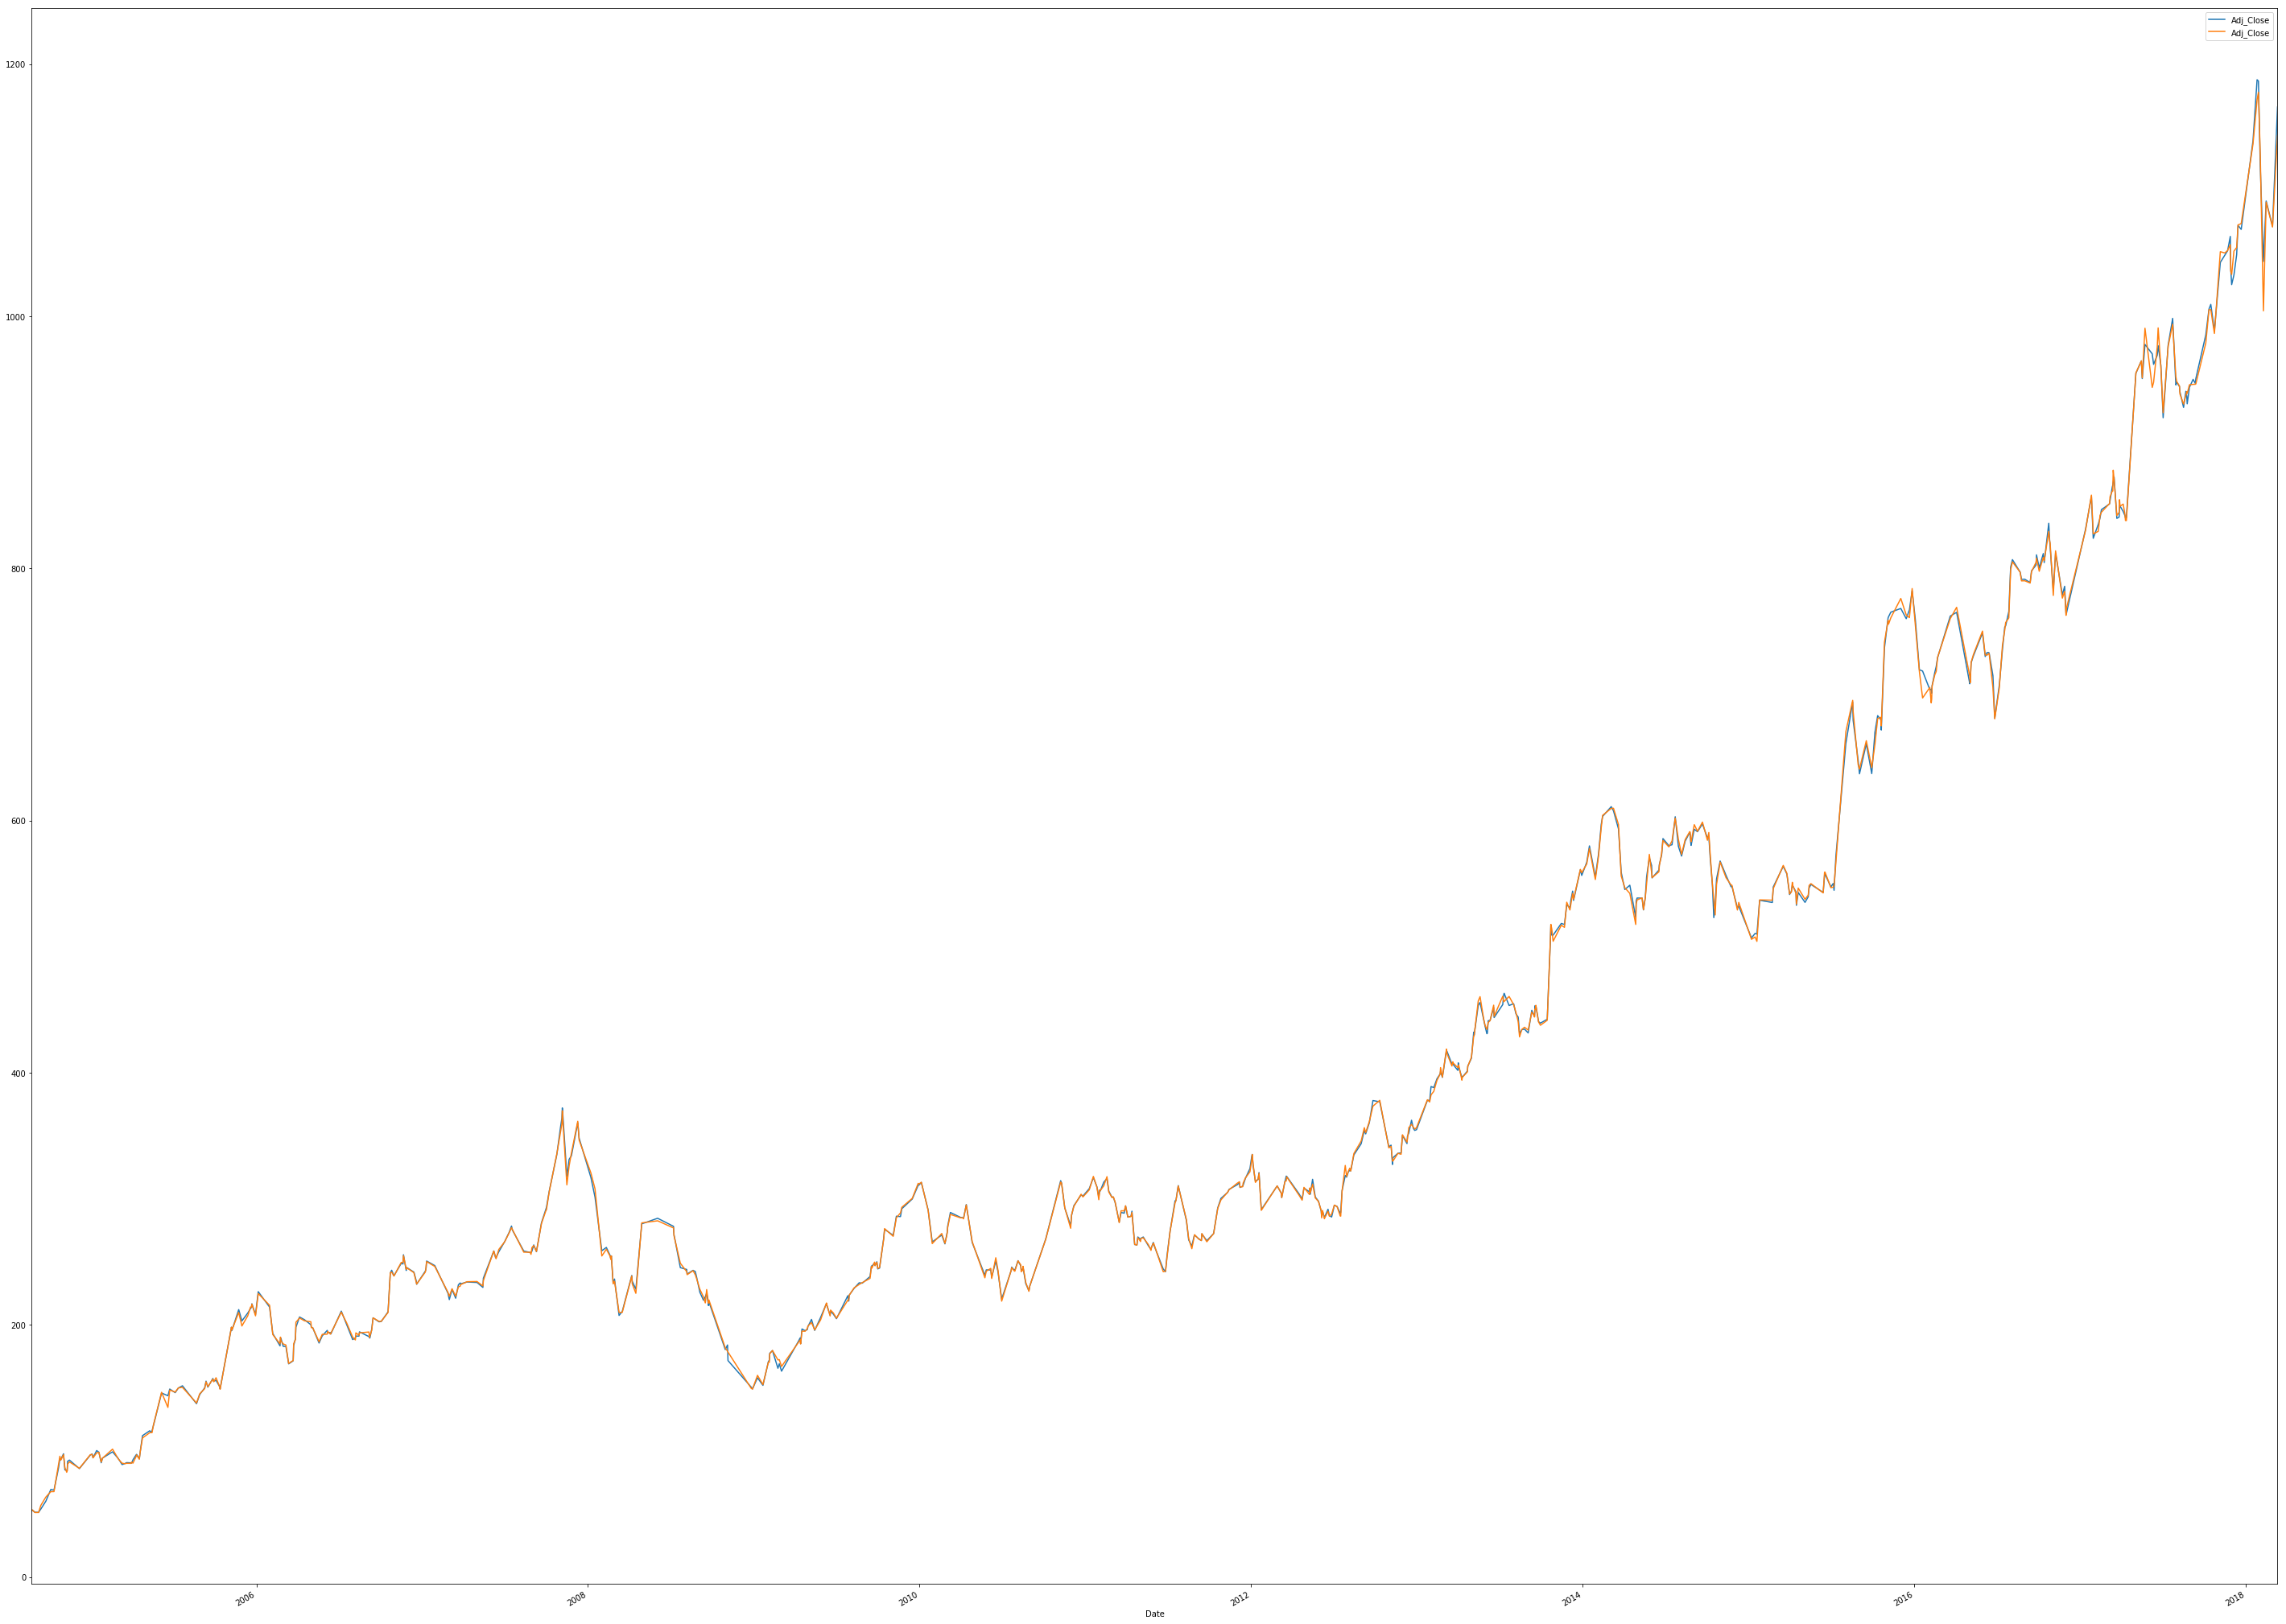

In [66]:
pred3df.set_index("Date", inplace = True)
p = ytest.plot()
pred3df.plot(ax=p,figsize=(50, 40))